# Week 3

In [165]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

### Network Centrality

Identifies the most importante nodes in a network
- Directed network: degree
- Undirected network: in-degree and/or out-degree

#### Directed Network

Centrailty(node) = degree(v) / (|all nodes| - 1)

0 <= Centrality <= 1

###### # Example 1

In [166]:
g = nx.karate_club_graph()

In [167]:
g = nx.convert_node_labels_to_integers(g, first_label=1)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


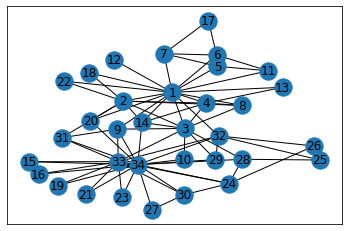

In [168]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [169]:
nx.center(g)

[1, 2, 3, 4, 9, 14, 20, 32]

In [170]:
nx.degree_centrality(g)[34] # 13/33

0.5151515151515151

In [171]:
nx.degree_centrality(g)[33] # 12/33

0.36363636363636365

#### Directed Network

###### # Example 2

In [172]:
gd = nx.MultiDiGraph()

In [173]:
e = [
        ('A', 'B'), ('A', 'E'), ('A', 'N'),
        ('B', 'C'), ('B', 'E'),
        ('C', 'A'), ('C', 'D'),
        ('D', 'B'), ('D', 'E'),
        ('E', 'D'), ('E', 'C'),
        ('F', 'G'),
        ('G', 'A'), ('G', 'J'),
        ('H', 'G'), ('H', 'I'),
        ('I', 'G'), ('I', 'F'), ('I', 'J'),
        ('J', 'F'), ('J', 'O'),
        ('K', 'L'), ('K', 'M'),
        ('L', 'M'),
        ('N', 'L'), ('N', 'O'),
        ('O', 'K'), ('O', 'L'),('O','J')
    ]

In [174]:
gd.add_edges_from(e)
gd

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


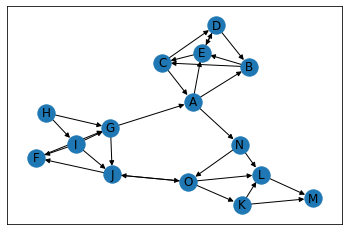

In [175]:
pos = nx.kamada_kawai_layout(gd)
nx.draw_networkx(gd, pos)

In [176]:
# IN-degree
i = nx.in_degree_centrality(gd)
# OUT-degree
o = nx.out_degree_centrality(gd)

In [177]:
i['A'], o['A']

(0.14285714285714285, 0.21428571428571427)

### Closenesse Centrality

Nodes that are important, will be close to other nodes

![closeness centrality](./media/ccentrality.png)

###### # Example 3

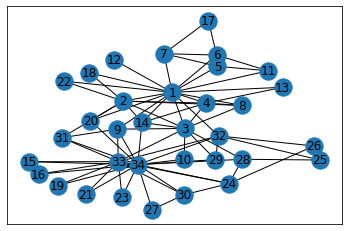

In [178]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [179]:
cc = nx.closeness_centrality(g)

In [180]:
cc[32]

0.5409836065573771

In [181]:
sum(nx.shortest_path_length(g, 32).values())

61

###### # Example 4

![disconnected](./media/disconnected.png)

In [182]:
nx.closeness_centrality(gd)

{'A': 0.32010582010582006,
 'B': 0.2700892857142857,
 'E': 0.27880184331797236,
 'N': 0.26190476190476186,
 'C': 0.2216117216117216,
 'D': 0.2216117216117216,
 'F': 0.2216117216117216,
 'G': 0.19206349206349205,
 'J': 0.2700892857142857,
 'H': 0.0,
 'I': 0.07142857142857142,
 'O': 0.28809523809523807,
 'K': 0.24489795918367344,
 'L': 0.32625482625482627,
 'M': 0.28}

![disconnected2](./media/disconnected2.png)

The nx.closeness_centrality() method is already normalized by

```( (n-1) / (|G|-1) )```

*There's **no** need to do it manually, like in the lecture!*

In [183]:
nx.closeness_centrality(gd)['L']

0.32625482625482627

### Betweenness Centrality

A node 'n' has high Betweenness Centrality if it appears a great number of times in the shortest paths between nodes 'u' and 'v'

![betweennes centrality](./media/beecentrality.png)

Note that we can either **include** or **exclude** the node 'v' as an **endpoint**

![betweennes centrality 2](./media/beecentrality02.png)

We consider Betweenness Centrality only for nodes who can be reached

###### # Example 5

In [184]:
g_noD = nx.DiGraph()

In [185]:
g_noD.add_edges_from([
    
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'A'),
    ('D', 'B'),
    ('D', 'C')
    
])

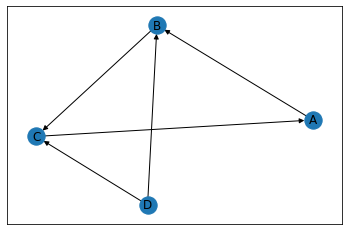

In [186]:
pos = nx.kamada_kawai_layout(g_noD)
nx.draw_networkx(g_noD, pos)

If we calculate the BetCentrality for node 'D', it would have us dividing by zero. Hence, we assume it as undefined.

###### # Example 6

In [187]:
g = nx.Graph()

In [188]:
g.add_edges_from(
    [
        ('A', 'B'), ('A', 'C'),
        ('B', 'C'),
        ('C', 'D'),
        ('D', 'E'),
        ('E', 'F'), ('E', 'G'),
        ('F', 'G')
    ]
)

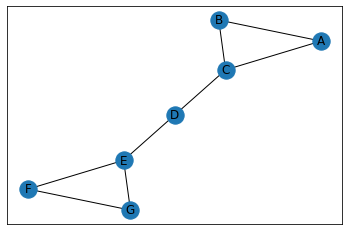

In [189]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [190]:
bcc = nx.betweenness_centrality(G=g, endpoints=False)
bcc

{'A': 0.0,
 'B': 0.0,
 'C': 0.5333333333333333,
 'D': 0.6,
 'E': 0.5333333333333333,
 'F': 0.0,
 'G': 0.0}

In [191]:
def maxKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(max(values))], max(list(x.values()))

def minKeyVal(x: dict):
    keys = list(x.keys())
    values = list(x.values())
    return keys[values.index(min(values))], min(list(x.values()))

In [192]:
maxKeyVal(bcc), minKeyVal(bcc)

(('D', 0.6), ('A', 0.0))

Normalization: BetCentrality values will be larger in graphs with many nodes.

- Undirected Graphs:
    
    ```1/2 * ((|N| - 1) * (|N| - 2))```

- Directed Graphs
    
    ```(|N| - 1) * (|N| - 2)```
    
nx.betweenness_centrality() method already has a 'normalized' parameter, True as default

###### # Example 7

Betweeness Centrality can be cost intensive

```O(|N|³)```

which leads us to calculate it using samples from the graph

In [193]:
g = nx.karate_club_graph()

In [194]:
g = nx.convert_node_labels_to_integers(g, first_label=1)

In [195]:
betCentrality = nx.betweenness_centrality(G=g, normalized=True, endpoints=False)

In [196]:
# Using (k = 10) samples
betCentrality_approx = nx.betweenness_centrality(G=g, normalized=True, endpoints=False, k=10)

In [197]:
from operator import itemgetter

In [198]:
# top 5 from bet
sorted(betCentrality.items(), key=itemgetter(1), reverse=True)[:6]

[(1, 0.43763528138528146),
 (34, 0.30407497594997596),
 (33, 0.145247113997114),
 (3, 0.14365680615680618),
 (32, 0.13827561327561325),
 (9, 0.05592682780182781)]

In [199]:
# top 5 from betCentrality_approx
sorted(betCentrality_approx.items(), key=itemgetter(1), reverse=True)[:6]

[(1, 0.3955065536315536),
 (34, 0.33117649711399705),
 (3, 0.20256237974987973),
 (33, 0.10783429533429534),
 (32, 0.1049416786916787),
 (9, 0.047403649591149594)]

###### # Example 8

Compute the BetCentrality between two groups, source and target groups

In [200]:
s_nodes = [34, 33, 21, 30, 16, 27, 15, 23, 10]
t_nodes = [1, 4, 13, 11, 6, 12, 17, 7]

In [201]:
betCen_subset = nx.betweenness_centrality_subset(G=g,
                                                sources=s_nodes,
                                                targets=t_nodes,
                                                normalized=True)

In [202]:
# top 5 from betCen_subset
sorted(betCen_subset.items(), key=itemgetter(1), reverse=True)[:6]

[(1, 0.04899515993265994),
 (34, 0.028807419432419434),
 (3, 0.018368205868205867),
 (33, 0.01664712602212602),
 (9, 0.014519450456950456),
 (32, 0.014519450456950456)]

###### # Example 9

Use BetCentrality to find imoprtant edges

In [203]:
betCen_edges = nx.edge_betweenness_centrality(G=g, normalized=True)

In [204]:
# top 5 from betCen_edges
sorted(betCen_edges.items(), key=itemgetter(1), reverse=True)[:6]

[((1, 32), 0.1272599949070537),
 ((1, 7), 0.07813428401663695),
 ((1, 6), 0.07813428401663694),
 ((1, 3), 0.0777876807288572),
 ((1, 9), 0.07423959482783014),
 ((3, 33), 0.06898678663384543)]

Compute the BetCentrality between two edges groups, source and target groups

In [205]:
betCen_edges_subset = nx.edge_betweenness_centrality_subset(G=g,
                                                            sources=s_nodes,
                                                            targets=t_nodes,
                                                            normalized=True)

In [206]:
# top 5 from betCen_edges_subset
sorted(betCen_edges_subset.items(), key=itemgetter(1), reverse=True)[:6]

[((1, 9), 0.01366536513595337),
 ((1, 32), 0.01366536513595337),
 ((14, 34), 0.012207509266332794),
 ((1, 3), 0.01211343123107829),
 ((1, 6), 0.012032085561497326),
 ((1, 7), 0.012032085561497326)]

#

In [207]:
# shoud have done it before...

from operator import itemgetter

def orderDict(x: dict, desc=True):
    return sorted(x.items(), key=itemgetter(1), reverse=desc)

#

### Page Rank

###### *(Best applied for Directed Networks)*

Suppose we have a network with n nodes

Each node will have a rank of ```1/n```. That implies that the ```sum()``` of all ranks is always equal to ```1```

Then, perform the ```PageRank Update Rule``` k times

PageRank Update Rule:

    Each node gives an equal share of its current PageRank to all the nodes to whom it is linked

###### # Example 10

Performing PageRake Update Rule for k = 2

![pageRank for k = 2](./media/pageRankUpdateKIs2_01.png)

![pageRank for k = 2](./media/pageRankUpdateKIs2_02.png)

![pageRank for k = 2](./media/pageRankUpdateKIs2_03.png)

If we continue increasing value of ```k```, usually, values start to converge and stabilize

![pageRank for k = 2](./media/pageRankUpdateKIs2_04.png)

### Scaled Page Rank

Random Walk of k steps:

```Start on a random node, then choose an outgoing edge at random an follow it to the next node; repeat k times.```

In [208]:
# The graph from the picture above
g = nx.DiGraph()

In [209]:
g.add_edges_from([
    ('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'B'), 
    ('D', 'A'), ('D', 'C'), ('D', 'E'), ('E', 'A'), 
])

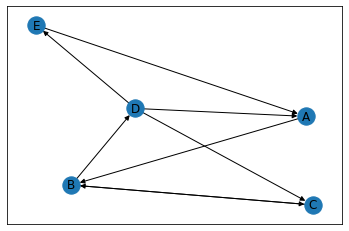

In [210]:
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)

We can interpreter a PageRank value as the probability of landing on a node (*page*) after ```k``` steps. Hence, the probability of landing on node 'B' at the end of a random walk is higher

###### # Example 11

In [211]:
g_new = g.copy()

In [212]:
# g with new nodes 'F', 'G', and new edges
g_new.add_edges_from([('B', 'F'), ('B', 'G'), ('F', 'G'), ('G', 'F')])

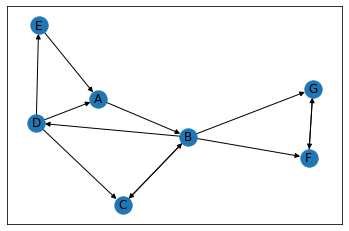

In [213]:
pos = nx.spring_layout(g_new)
nx.draw_networkx(g_new, pos)

Random walks will probably land on nodes 'F' or 'G', since either of them is only connected to each other

We add a damping parameter ```alfa```. Changing the behaviour of our Random Walk:

- Start a node 'v', then:
    - With probabilty ```alfa```: choose an outgoing edge and follow it to the next node;
    - With probabilty ```1 - alfa```: choose a random node and jump directly to it;
    - Repeat ```k```times

Now we have a way out to not be locked on nodes 'F' or 'G'

In [214]:
# Simple PageRank
pr_g = nx.pagerank(g)

In [215]:
# PageRank for g_new
# nx.pagerank() already has a standard alpha parameter of 0.85
pr_gnew = nx.pagerank(g_new)

In [216]:
# but we can change it
pr_gnew_a = nx.pagerank(G=g_new, alpha=0.9)

In [217]:
orderDict(pr_g)

[('B', 0.35519316255962574),
 ('C', 0.23222770978534224),
 ('D', 0.18095642215666963),
 ('A', 0.15035141786968964),
 ('E', 0.08127128762867263)]

In [218]:
orderDict(pr_gnew)

[('G', 0.3280507927524911),
 ('F', 0.328050792752491),
 ('B', 0.13072972919003595),
 ('A', 0.06543693487722958),
 ('C', 0.06315158949959035),
 ('D', 0.04920893254397847),
 ('E', 0.03537122838418331)]

In [219]:
orderDict(pr_gnew_a)

[('F', 0.37011515621714647),
 ('G', 0.3701151562171464),
 ('B', 0.10100891814607932),
 ('A', 0.04824078073043102),
 ('C', 0.04811713720174119),
 ('D', 0.03701306787128782),
 ('E', 0.02538978361616765)]

### Hubs and Authorities

- Root: Set of highly relevant web pages. Potential authorities;

- Base: Root nodes and any node that links to a node in root;

- Hubs: Nodes that are not our target, but link to those who are;

- Authorities: Interest node(s)

"Hubs estimates the node value based on *outgoing links*

Authorities estimates the node value based on the *incoming links*"

Consider all the edges connecting nodes in the base set

![base](./media/base.png)

Instead of calculating the PageRank for all nodes in the network, we begin with a subset of the network, trying to work with possible strong candidates

###### # Example 12

HITS Algorithm:

- Assign each node an ```Authtority & Hub Score``` of ```1```;

- Apply the Authority Update Rule:
    - Each node's authority score is the sum of ```hub scores```of each node that **points to it**
    
- Apply the Hub Update Rule:
    - Each node's hub score is the sum of ```authority scores``` of each node that **it points to**
    
- Normalize Authority and Hub scores:
    - ```auth(j) = auth(j) / sum(auth(i))```
    - ```hub(j) = hub(j) / sum(hub(i))```

- Repeat ```k``` times

In [220]:
g = nx.DiGraph()

In [221]:
g.add_edges_from(
    [
        ('A', 'D'),
        ('B', 'C'), ('B', 'E'),
        ('C', 'A'),
        ('D', 'B'), ('D', 'C'),
        ('E', 'B'), ('E', 'C'), ('E', 'D'), ('E', 'F'),
        ('F', 'C'), ('F', 'H'),
        ('G', 'C'), ('G', 'A'),
        ('H', 'A')
    ]
)

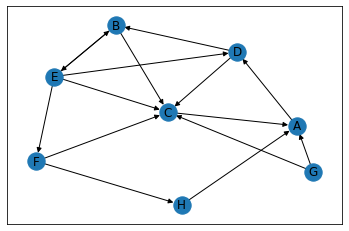

In [222]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

![hits_01](./media/hits01.png)

![hits_02](./media/hits02.png)

![hits_03](./media/hits03.png)

![hits_04](./media/hits04.png)

For most networks, as ```k``` grows, the authority and hub scores do converge to a unique value 

![hits_05](./media/hits05.png)

In [223]:
hub, autr = nx.hits(g)

In [224]:
orderDict(autr)[:3]

[('C', 0.36903609552875044),
 ('B', 0.18704574147053715),
 ('D', 0.1276828398619346)]

In [225]:
orderDict(hub)[:3]

[('E', 0.26762580012702586),
 ('D', 0.18749100142258587),
 ('G', 0.15393432501469498)]

Nodes that have:
- **incoming** edges from ```good hubs``` are ```good authorities```
- **outgoing** edges to ```good authorities``` are ```good hubs```

### ?

###### # Example 13